In [1]:
import os, shutil
import numpy as np

from matplotlib import image, pyplot
from skimage.transform import resize


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

from tensorflow.keras import callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, f1_score, recall_score,classification_report,roc_curve, auc 
from sklearn.utils import class_weight

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from PIL import Image,ImageFile


In [2]:
DATA_PATH = "COVID-19_Radiography_Dataset/"
training_data=[]
label=[]
count=-1
for folder in os.listdir(DATA_PATH):
    print(">>>Reading ",folder)
    count+=1
    for file in os.listdir(DATA_PATH+folder):
            img = image.imread(DATA_PATH+folder+'/'+file)
            training_data.append(resize(img, (156, 156, 3))) 
            label.append(count)
training_data=np.array(training_data)
label=np.array(label)

>>>Reading  COVID
>>>Reading  Lung_Opacity
>>>Reading  Normal
>>>Reading  Viral Pneumonia


In [3]:
print("Number of COVID:",len(label[label==0]))
print("Number of Lung_opacity:",len(label[label==1]))
print("Number of Normal:",len(label[label==2]))
print("Number of Viral Pneumonia:",len(label[label==3]))

Number of COVID: 3616
Number of Lung_opacity: 6012
Number of Normal: 10192
Number of Viral Pneumonia: 1345


In [5]:
print("Training data shape : ",training_data.shape," Label shape : ",label.shape)

Training data shape :  (21165, 156, 156, 3)  Label shape :  (21165,)


In [6]:
test_valid_Percentage = 0.3
x_train,x_test,y_train,y_test = train_test_split(training_data,label,test_size = test_valid_Percentage,random_state=42, stratify=label,shuffle=True)

In [7]:
print("x_train shape : ",x_train.shape," y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape," y_test shape : ",y_test.shape)

x_train shape :  (14815, 156, 156, 3)  y_train shape :  (14815,)
x_test shape :  (6350, 156, 156, 3)  y_test shape :  (6350,)


In [8]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

print("y_train_oh shape : ",y_train_oh.shape," y_test_oh shape : ",y_test_oh.shape)

y_train_oh shape :  (14815, 4)  y_test_oh shape :  (6350, 4)


In [9]:
NO_OF_EPOCHS=10
// cnn layers
BATCH_SIZE=128

model=Sequential()
model.add(Conv2D(32,kernel_size=3, padding='same',activation='relu',input_shape=(156, 156,3)))
model.add(MaxPool2D(pool_size=(4, 4)))
model.add(Conv2D(64,kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Conv2D(128,kernel_size=3, padding='same',activation='relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 156, 156, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 dropout (Dropout)           (None, 13, 13, 128)       0

In [10]:
model.fit(x_train,y_train_oh,epochs=NO_OF_EPOCHS,verbose=1,batch_size=BATCH_SIZE,validation_split = 0.2)

Epoch 1/10
93/93 [==============================] - 232s 2s/step - loss: 0.8556 - accuracy: 0.6380 - val_loss: 0.6884 - val_accuracy: 0.7222
Epoch 2/10
93/93 [==============================] - 211s 2s/step - loss: 0.5651 - accuracy: 0.7773 - val_loss: 0.4694 - val_accuracy: 0.8208
Epoch 3/10
93/93 [==============================] - 259s 3s/step - loss: 0.4566 - accuracy: 0.8269 - val_loss: 0.4937 - val_accuracy: 0.8188
Epoch 4/10
93/93 [==============================] - 248s 3s/step - loss: 0.4170 - accuracy: 0.8403 - val_loss: 0.3791 - val_accuracy: 0.8623
Epoch 5/10
93/93 [==============================] - 256s 3s/step - loss: 0.3631 - accuracy: 0.8665 - val_loss: 0.3606 - val_accuracy: 0.8653
Epoch 6/10
93/93 [==============================] - 259s 3s/step - loss: 0.3281 - accuracy: 0.8770 - val_loss: 0.3371 - val_accuracy: 0.8755
Epoch 7/10
93/93 [==============================] - 259s 3s/step - loss: 0.2860 - accuracy: 0.8917 - val_loss: 0.3382 - val_accuracy: 0.8748
Epoch 8/10
93

In [11]:
prediction_prob1 = model.predict(x_test,verbose=1)
y_pred=np.round(prediction_prob1)

199/199 [==============================] - 39s 193ms/step


In [12]:
print(accuracy_score(y_test_oh,y_pred))
print(precision_score(y_test_oh,y_pred,average='weighted'))
print(recall_score(y_test_oh,y_pred,average='weighted'))
print(f1_score(y_test_oh,y_pred,average='weighted'))
#print(confusion_matrix(y_test_oh,y_pred))
print(classification_report(y_test_oh,y_pred))

0.8776377952755906
0.8864711879711086
0.8776377952755906
0.8816607312910171
              precision    recall  f1-score   support

           0       0.95      0.86      0.91      1085
           1       0.83      0.83      0.83      1804
           2       0.89      0.90      0.90      3058
           3       0.92      0.95      0.93       403

   micro avg       0.89      0.88      0.88      6350
   macro avg       0.90      0.89      0.89      6350
weighted avg       0.89      0.88      0.88      6350
 samples avg       0.88      0.88      0.88      6350



C:\Users\pvabh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


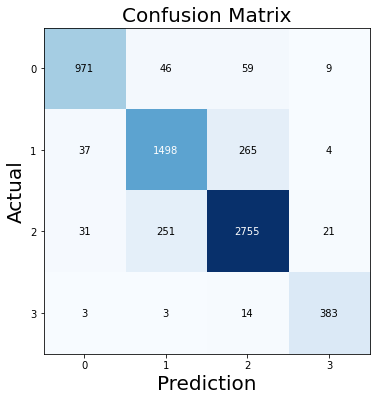

In [14]:
labels= ['COVID', 'Lung_Opacity','Normal' 'Viral Pneumonia']
cf = confusion_matrix(y_test_oh.argmax(axis = 1),y_pred.argmax(axis = 1))
fig, ax = plot_confusion_matrix(conf_mat=cf, figsize=(9, 6), cmap=plt.cm.Blues)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [54]:
m1model = Model(inputs=model.input,outputs=model.get_layer('dense_1').output)

In [55]:
m1_x_train = m1model.predict(x_train,verbose=1)
m1_x_test = m1model.predict(x_test,verbose=1)


199/199 [==============================] - 21s 105ms/step


In [17]:
print("Shape of model1 Train and Test DF : ",m1_x_train.shape," : ",m1_x_test.shape)

Shape of model1 Train and Test DF :  (14815, 4)  :  (6350, 4)


In [18]:
def printMetrics(true,pred):
    print("Accuracy : ",accuracy_score(true, pred))
    print("Precision",precision_score(true, pred , average="weighted"))
    print("Recall : ",recall_score(true, pred , average="weighted"))
    print("F1-score : ",f1_score(true, pred, average="weighted"))
    print("Confusion Matrix : ")
    print(confusion_matrix(true, pred))
    print(classification_report(true,pred))

In [19]:
LR = LogisticRegression()
LR.fit(m1_x_train, y_train)
LRprob = LR.predict_proba(m1_x_test)
y_pred = LR.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)



cost-insensitive
Accuracy :  0.8886614173228347
Precision 0.888813277454533
Recall :  0.8886614173228347
F1-score :  0.8883330971970859
Confusion Matrix : 
[[ 970   45   61    9]
 [  31 1478  292    3]
 [  26  202 2815   15]
 [   2    3   18  380]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1085
           1       0.86      0.82      0.84      1804
           2       0.88      0.92      0.90      3058
           3       0.93      0.94      0.94       403

    accuracy                           0.89      6350
   macro avg       0.90      0.89      0.90      6350
weighted avg       0.89      0.89      0.89      6350



In [20]:
RF = RandomForestClassifier()
RF.fit(m1_x_train, y_train)
RFprob = RF.predict_proba(m1_x_test)
y_pred = RF.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)


cost-insensitive
Accuracy :  0.8792125984251968
Precision 0.8787881804984866
Recall :  0.8792125984251968
F1-score :  0.8786696891338944
Confusion Matrix : 
[[ 985   37   54    9]
 [  42 1444  314    4]
 [  44  219 2777   18]
 [   2    3   21  377]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1085
           1       0.85      0.80      0.82      1804
           2       0.88      0.91      0.89      3058
           3       0.92      0.94      0.93       403

    accuracy                           0.88      6350
   macro avg       0.89      0.89      0.89      6350
weighted avg       0.88      0.88      0.88      6350



In [21]:
DT = DecisionTreeClassifier()
DT.fit(m1_x_train, y_train)
DTprob = DT.predict_proba(m1_x_test)
y_pred = DT.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)



cost-insensitive
Accuracy :  0.852755905511811
Precision 0.8524541909408544
Recall :  0.852755905511811
F1-score :  0.8525899550443887
Confusion Matrix : 
[[ 963   54   57   11]
 [  58 1416  326    4]
 [  64  311 2661   22]
 [   3    3   22  375]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1085
           1       0.79      0.78      0.79      1804
           2       0.87      0.87      0.87      3058
           3       0.91      0.93      0.92       403

    accuracy                           0.85      6350
   macro avg       0.86      0.87      0.87      6350
weighted avg       0.85      0.85      0.85      6350



In [22]:

KNN = KNeighborsClassifier()
KNN.fit(m1_x_train, y_train)
KNNprob = KNN.predict_proba(m1_x_test)
y_pred = KNN.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)



cost-insensitive
Accuracy :  0.8790551181102362
Precision 0.8786065730928212
Recall :  0.8790551181102362
F1-score :  0.8782769227522423
Confusion Matrix : 
[[ 991   37   48    9]
 [  46 1425  330    3]
 [  50  202 2791   15]
 [   2    4   22  375]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1085
           1       0.85      0.79      0.82      1804
           2       0.87      0.91      0.89      3058
           3       0.93      0.93      0.93       403

    accuracy                           0.88      6350
   macro avg       0.89      0.89      0.89      6350
weighted avg       0.88      0.88      0.88      6350



In [23]:

GNB = GaussianNB()
GNB.fit(m1_x_train, y_train)
GNBprob = GNB.predict_proba(m1_x_test)
y_pred = GNB.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)



cost-insensitive
Accuracy :  0.8822047244094489
Precision 0.8824387392135378
Recall :  0.8822047244094489
F1-score :  0.8822710083637678
Confusion Matrix : 
[[ 985   47   43   10]
 [  39 1504  260    1]
 [  38  267 2728   25]
 [   2    3   13  385]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1085
           1       0.83      0.83      0.83      1804
           2       0.90      0.89      0.89      3058
           3       0.91      0.96      0.93       403

    accuracy                           0.88      6350
   macro avg       0.89      0.90      0.89      6350
weighted avg       0.88      0.88      0.88      6350



In [24]:
AB = AdaBoostClassifier()
AB.fit(m1_x_train, y_train)
ABprob = AB.predict_proba(m1_x_test)
y_pred = AB.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)



cost-insensitive
Accuracy :  0.732755905511811
Precision 0.795860314063767
Recall :  0.732755905511811
F1-score :  0.7316020228645368
Confusion Matrix : 
[[ 941   42   91   11]
 [  45 1656  102    1]
 [  63 1291 1672   32]
 [   2    4   13  384]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1085
           1       0.55      0.92      0.69      1804
           2       0.89      0.55      0.68      3058
           3       0.90      0.95      0.92       403

    accuracy                           0.73      6350
   macro avg       0.81      0.82      0.79      6350
weighted avg       0.80      0.73      0.73      6350



In [25]:
LSVM = svm.SVC(kernel='linear',probability=True)
LSVM.fit(m1_x_train, y_train)
LSVMprob = LSVM.predict_proba(m1_x_test)
y_pred = LSVM.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)



cost-insensitive
Accuracy :  0.8878740157480315
Precision 0.8876349523307789
Recall :  0.8878740157480315
F1-score :  0.8872803051641809
Confusion Matrix : 
[[ 981   40   54   10]
 [  42 1458  300    4]
 [  33  190 2819   16]
 [   2    3   18  380]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1085
           1       0.86      0.81      0.83      1804
           2       0.88      0.92      0.90      3058
           3       0.93      0.94      0.93       403

    accuracy                           0.89      6350
   macro avg       0.90      0.89      0.90      6350
weighted avg       0.89      0.89      0.89      6350



In [26]:
RSVM = svm.SVC(kernel='rbf',probability=True)
RSVM.fit(m1_x_train, y_train)
RSVMprob = RSVM.predict_proba(m1_x_test)
y_pred = RSVM.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)



cost-insensitive
Accuracy :  0.8877165354330708
Precision 0.8877511397411241
Recall :  0.8877165354330708
F1-score :  0.8869296748165371
Confusion Matrix : 
[[ 980   40   55   10]
 [  38 1440  323    3]
 [  34  173 2837   14]
 [   2    3   18  380]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1085
           1       0.87      0.80      0.83      1804
           2       0.88      0.93      0.90      3058
           3       0.93      0.94      0.94       403

    accuracy                           0.89      6350
   macro avg       0.90      0.89      0.90      6350
weighted avg       0.89      0.89      0.89      6350



## Prediction

In [62]:
import tensorflow as tf

In [63]:
testimg = image.imread("COVID-19_Radiography_Dataset/Lung_Opacity/Lung_Opacity-1.png")
testimg = resize(testimg, (156, 156, 3))

In [64]:
new_image = tf.expand_dims(testimg,0)
new_image = m1model.predict(new_image,verbose=1)
RF.predict(new_image)

1/1 [==============================] - 0s 52ms/step


array([1])

In [60]:
from keras.models import load_model
testmodel = load_model('model.h5')

In [71]:
xyz = image.imread("COVID-19_Radiography_Dataset/Normal/Normal-11.png")
xyz = resize(xyz, (156, 156, 3))
xyz = tf.expand_dims(xyz,0)
xyz = testmodel.predict(xyz,verbose=1)
loaded_model = pickle.load(open("RFModel.pkl", 'rb'))
loaded_model.predict(xyz)

1/1 [==============================] - 0s 36ms/step


array([2])